In [135]:
!pip install numpy


In [136]:
!pip install pandas

In [137]:
!pip install matplotlib


In [138]:
!pip install seaborn


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline 
import seaborn as sns


In [140]:
df=pd.read_csv("Diwali Sales Data.csv",  encoding="unicode_escape")

In [141]:
df.shape


(11251, 15)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [143]:
df.drop([ "Status","unnamed1" ], axis=1, inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [145]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [146]:
df.dropna(inplace= True)

In [147]:
pd.isnull(df).sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [148]:
df['Amount']=df['Amount'].astype(int)

In [149]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


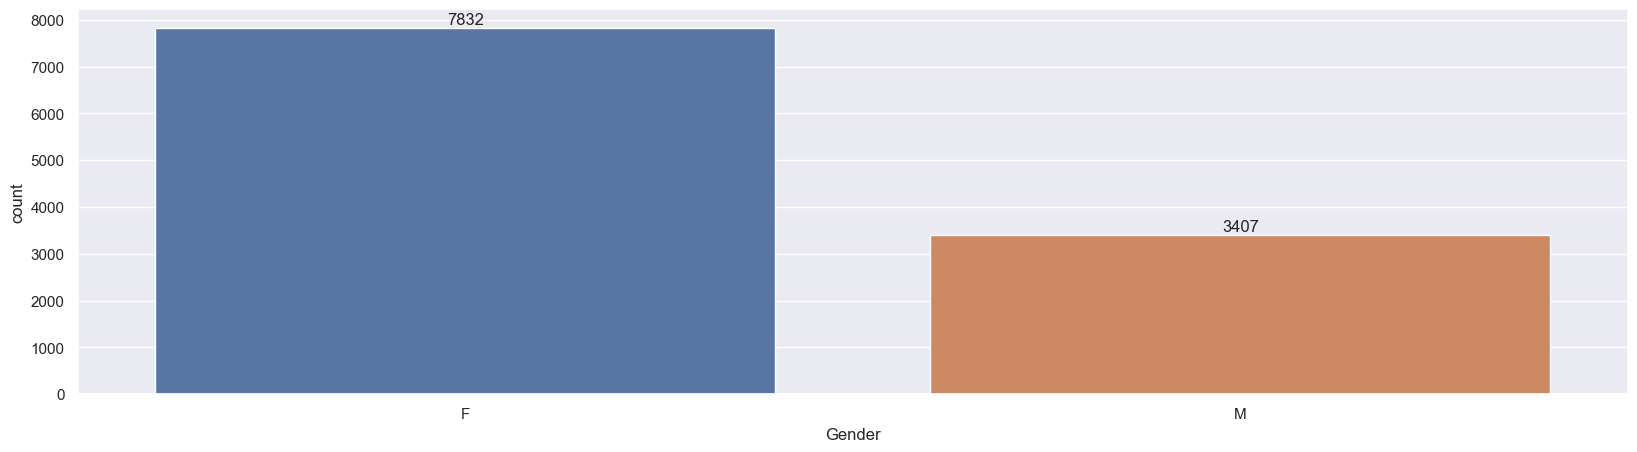

In [150]:
ax= sns.countplot(x='Gender', hue='Gender' ,data=df)
for bars in ax.containers:
    ax.bar_label(bars)


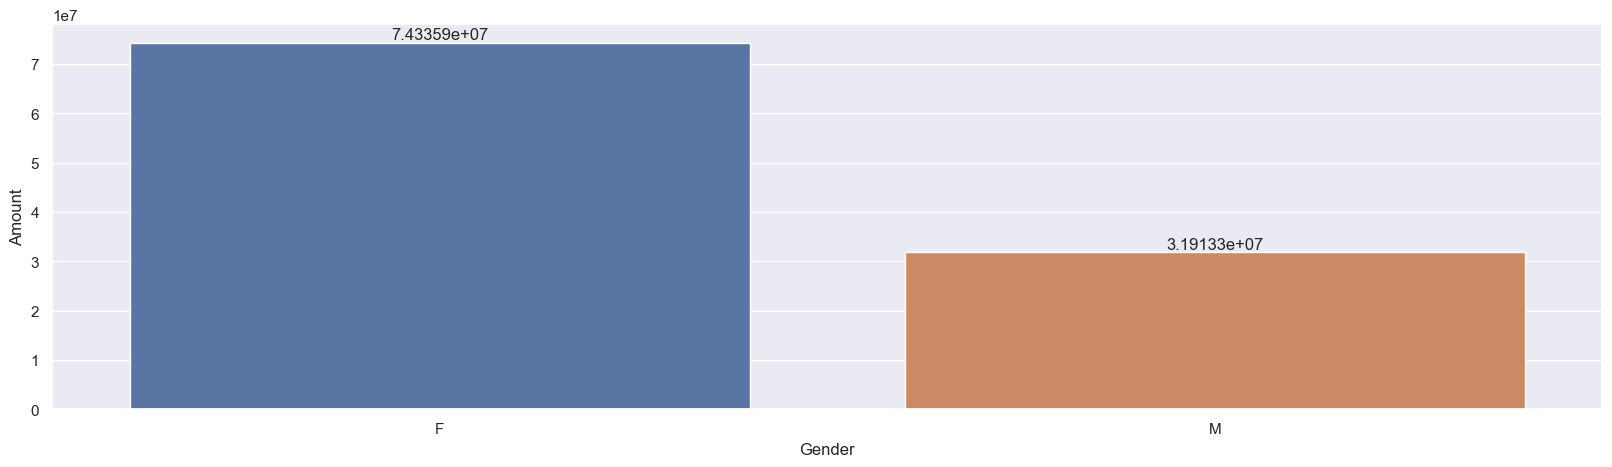

In [151]:
sales_gender=df.groupby( ['Gender'],as_index=False)['Amount'].sum().sort_values( by='Amount' ,ascending=False)
af=sns.barplot(x='Gender', y='Amount', data=sales_gender,hue='Gender')
for bars in af.containers:
    af.bar_label(bars)


In [152]:
df.columns



Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

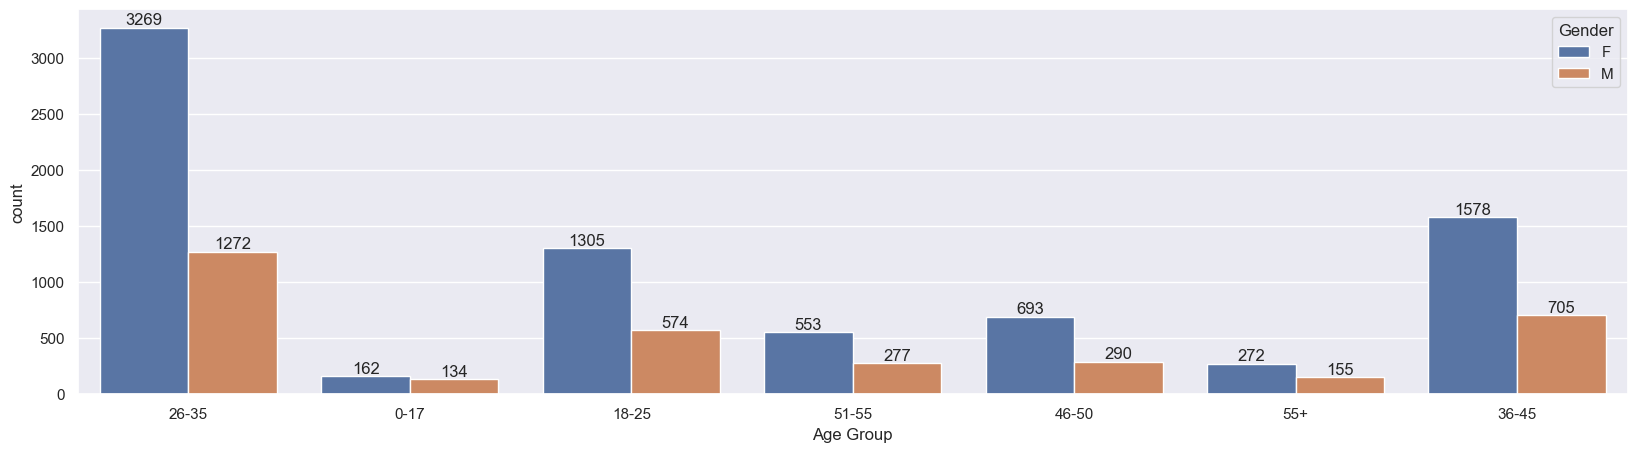

In [153]:
ax= sns.countplot( x='Age Group', data=df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

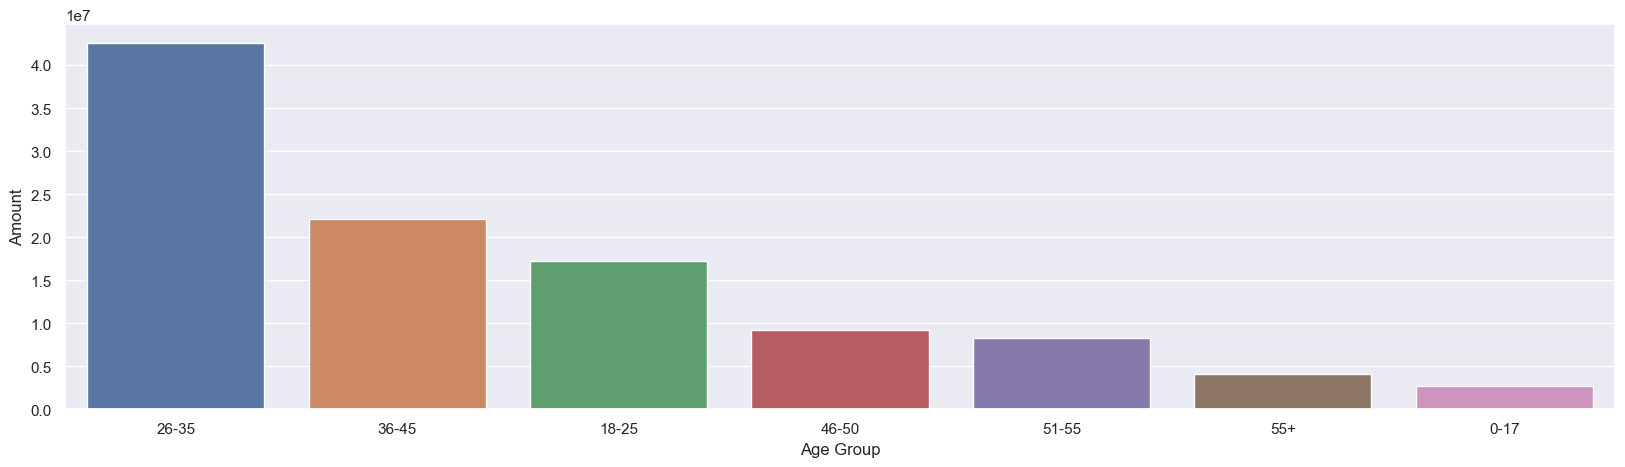

In [154]:
sales_age=df.groupby( ['Age Group'], as_index=False )['Amount'].sum().sort_values( by='Amount', ascending=False )
sns.barplot(x='Age Group', y='Amount' , data=sales_age, hue= 'Age Group' )

<Axes: xlabel='State', ylabel='Amount'>

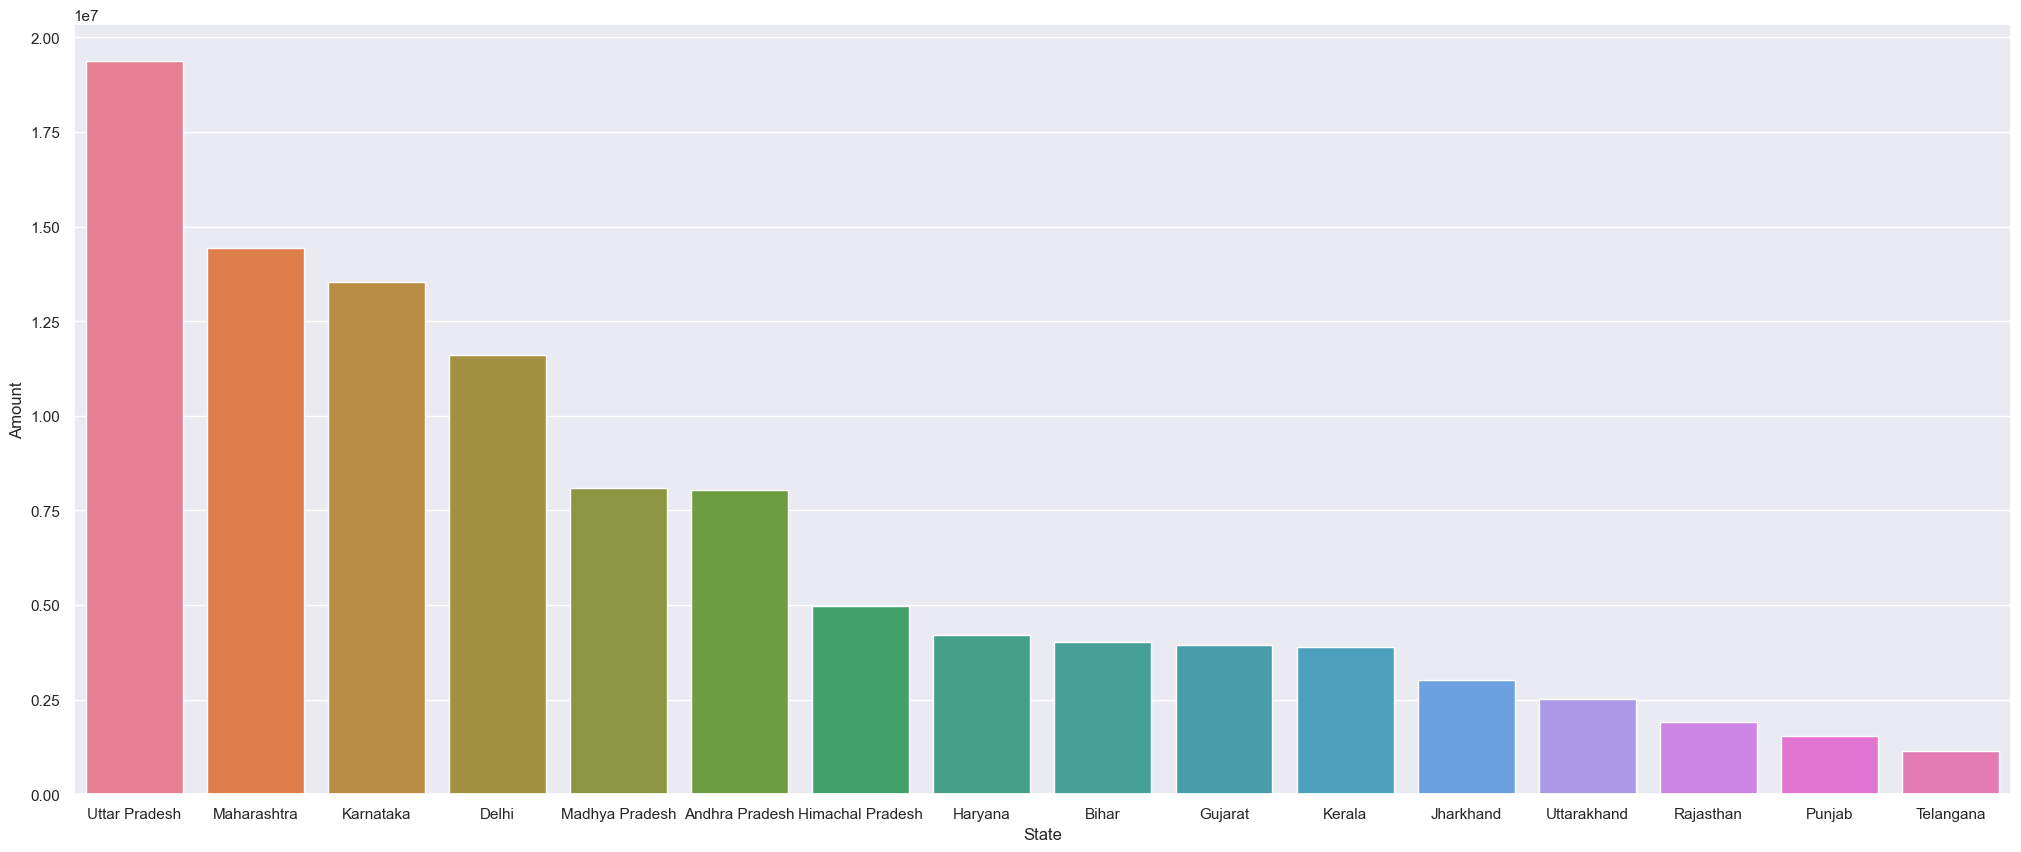

In [155]:
sales_state=df.groupby(['State'] , as_index=False)['Amount'].sum().sort_values( by='Amount', ascending=False)
sns.set_theme(rc={'figure.figsize':(25,10)})

sns.barplot(x='State',y='Amount' ,data=sales_state, hue='State' )


<Axes: xlabel='State', ylabel='Orders'>

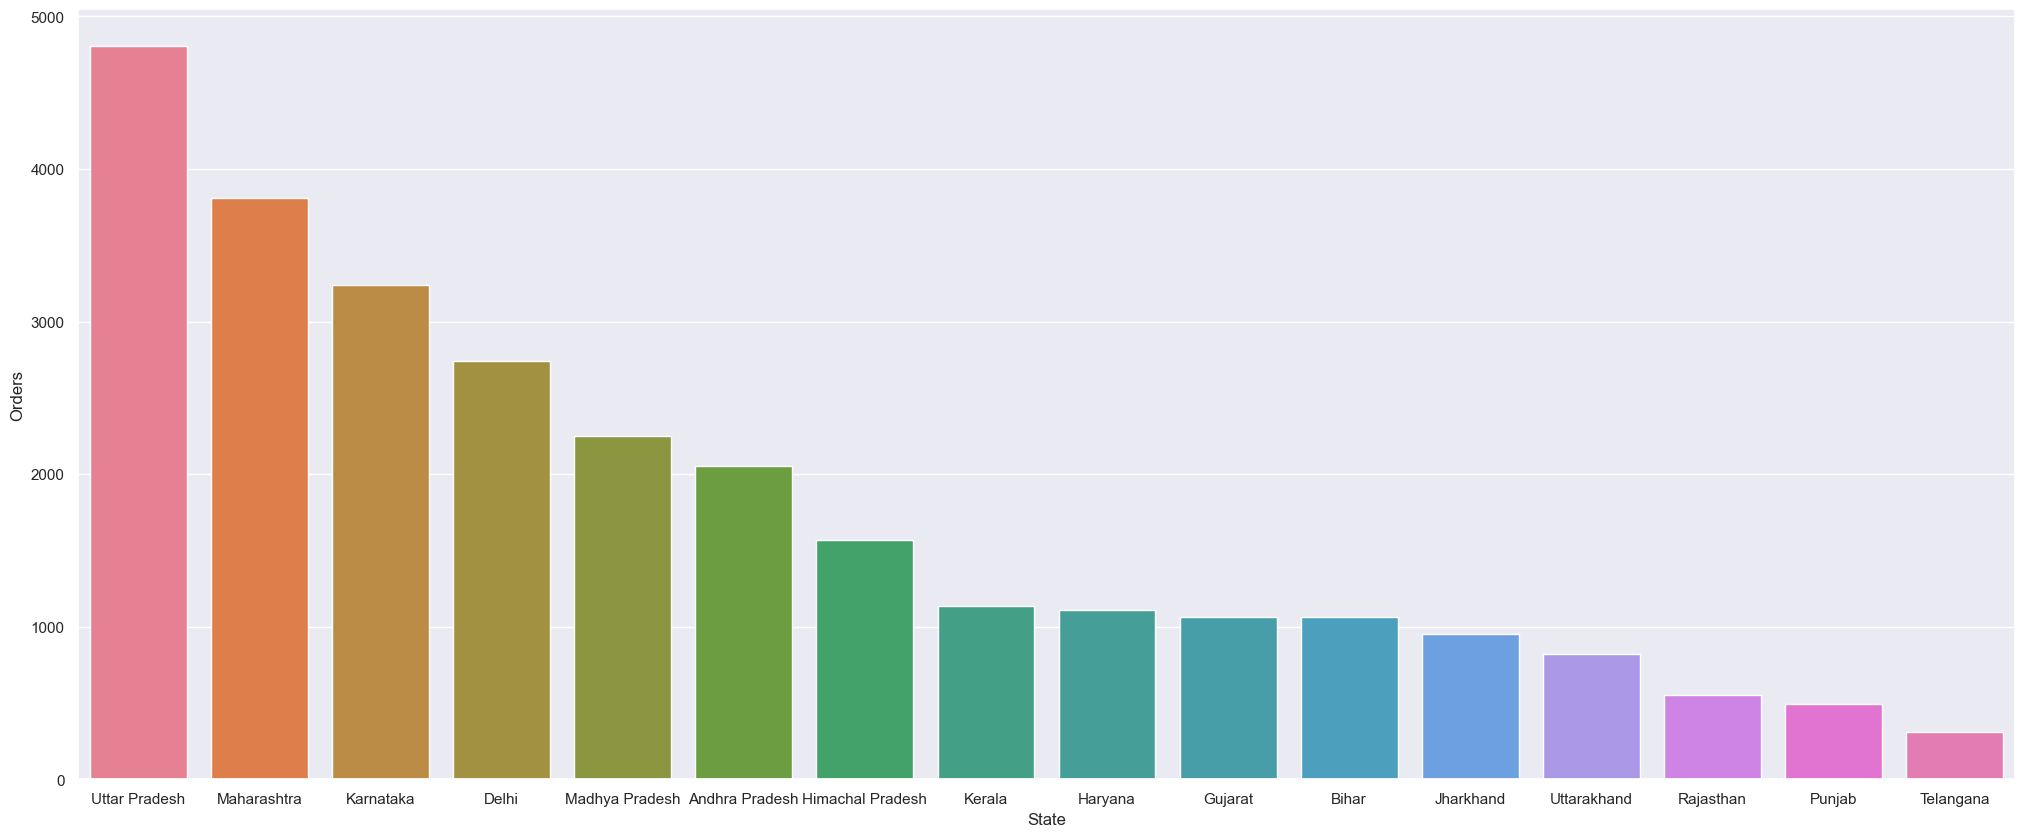

In [156]:
sales_state=df.groupby(['State'] , as_index=False)['Orders'].sum().sort_values( by='Orders', ascending=False)
sns.set_theme(rc={'figure.figsize':(25,10)})

sns.barplot(x='State',y='Orders' ,data=sales_state, hue='State' )


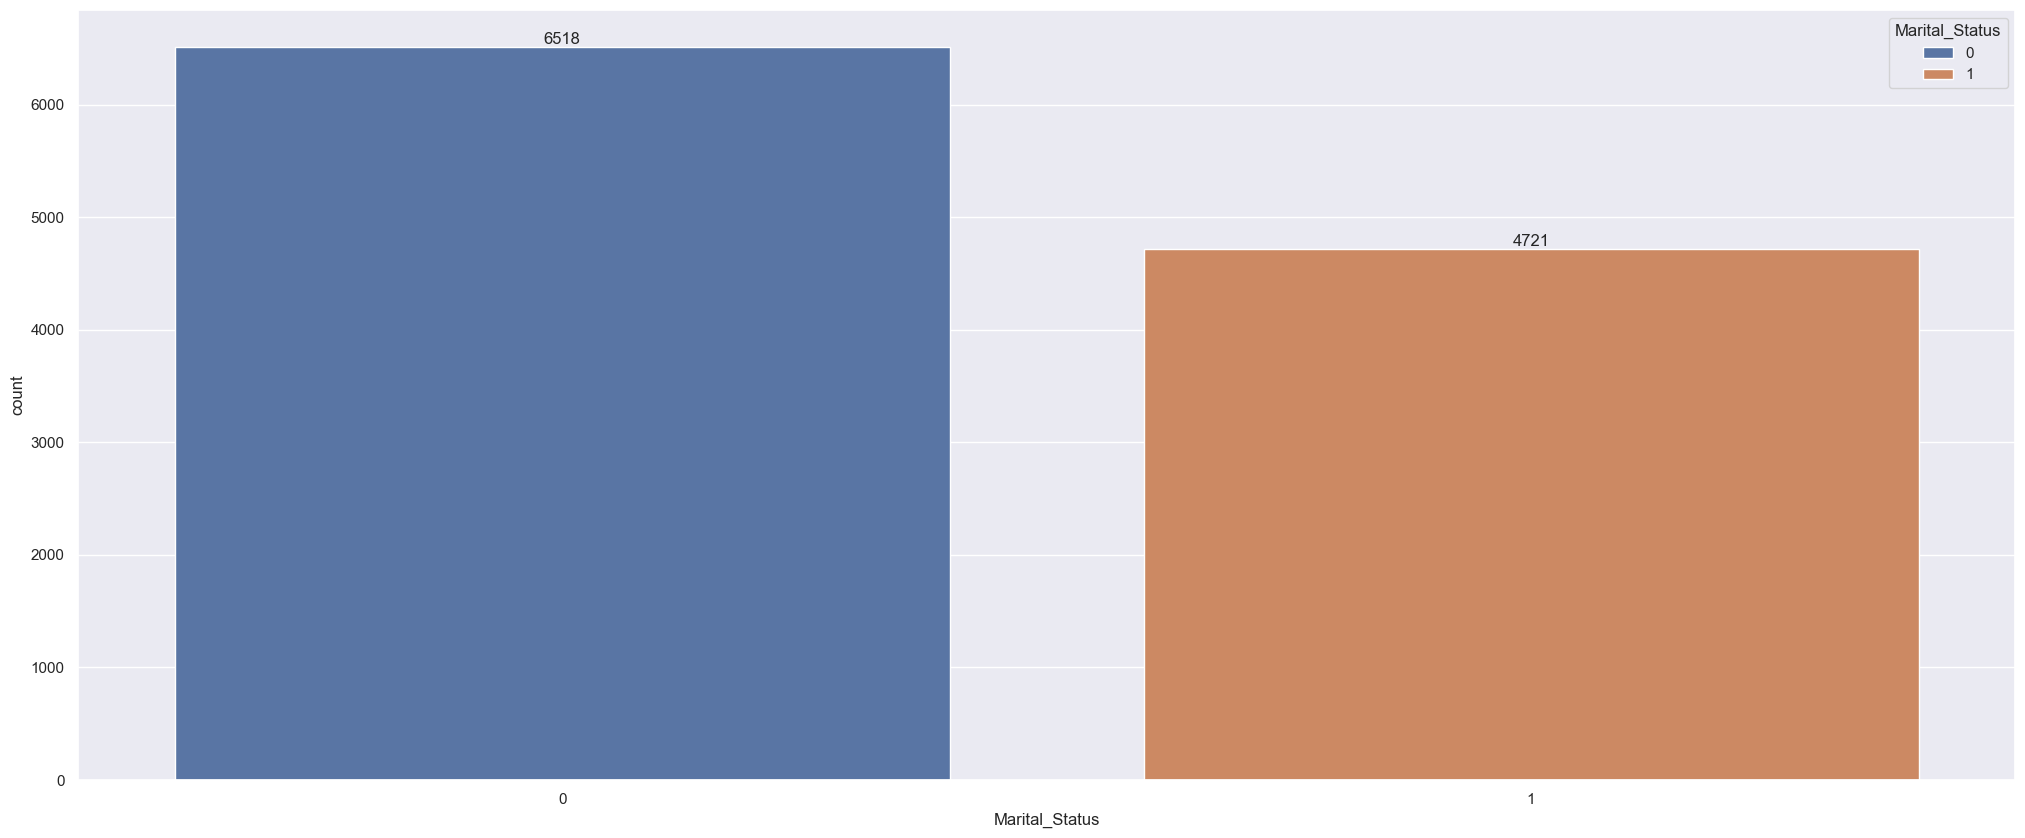

In [157]:
ax = sns.countplot(data = df, x = 'Marital_Status' ,hue='Marital_Status')

sns.set_theme(rc={'figure.figsize':(10,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

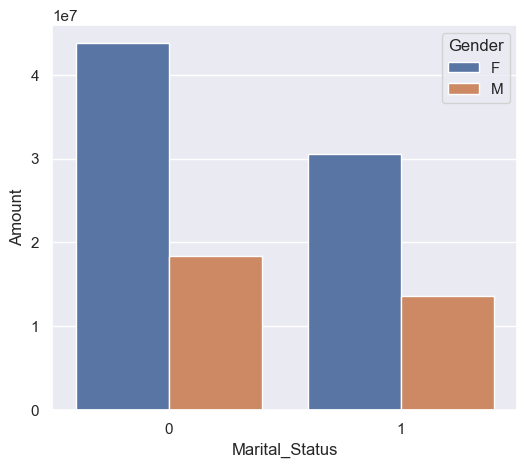

In [158]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

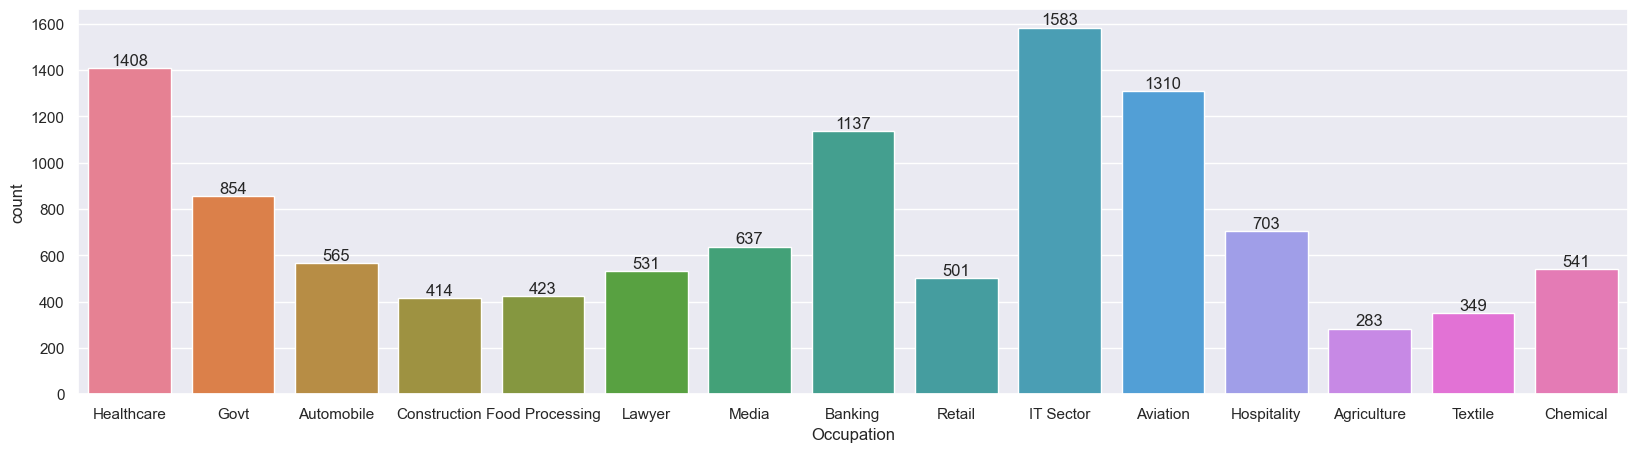

In [159]:
sns.set_theme(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation' ,hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

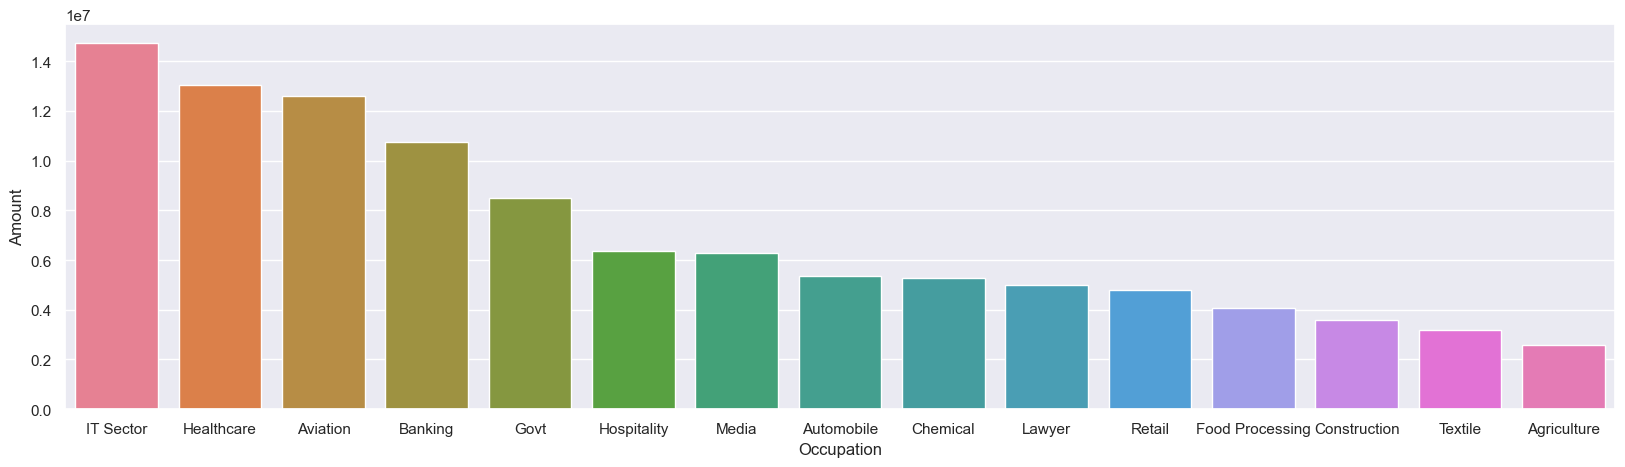

In [160]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount' ,hue='Occupation')

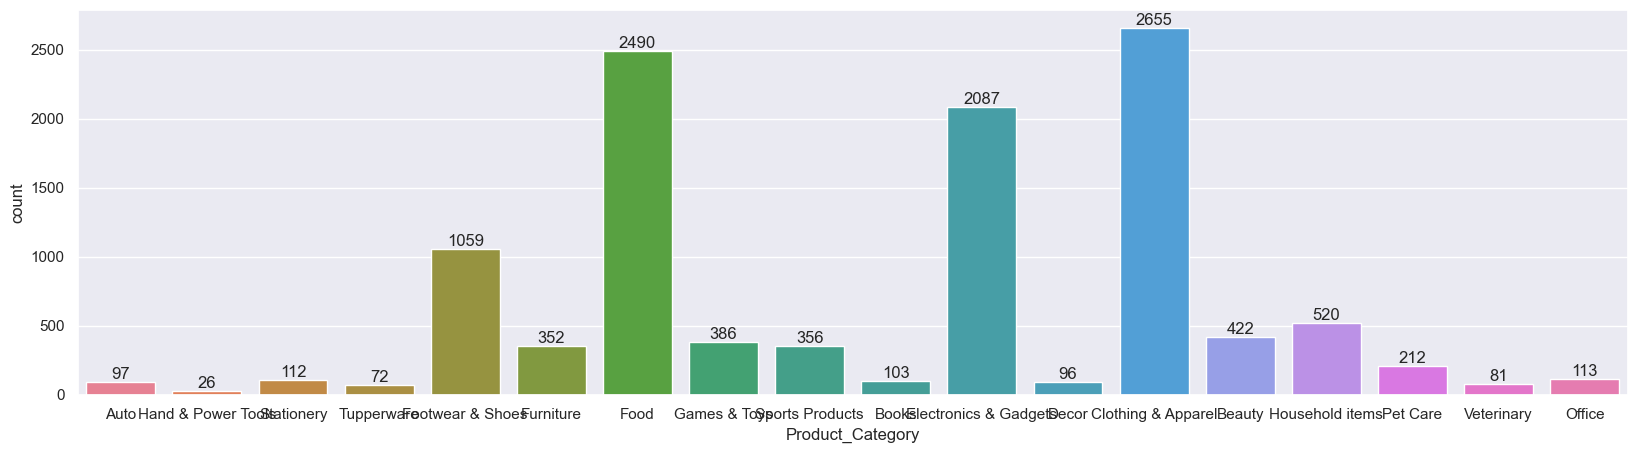

In [161]:
sns.set_theme(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category' ,hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

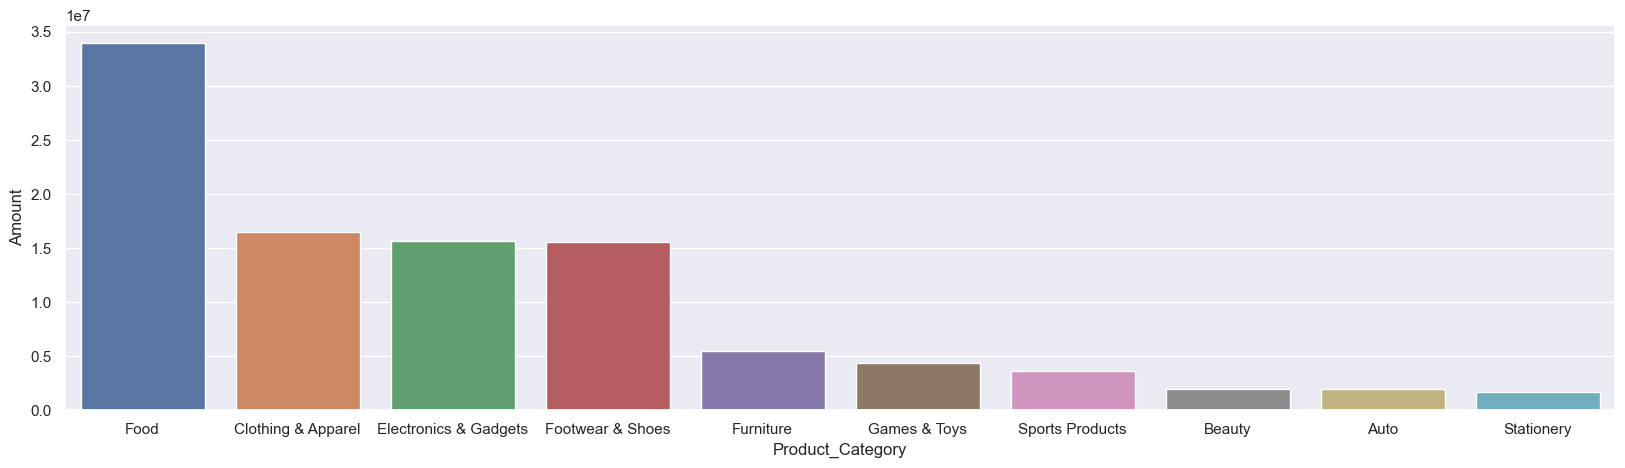

In [162]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount' ,hue='Product_Category')

<Axes: xlabel='Product_ID', ylabel='Orders'>

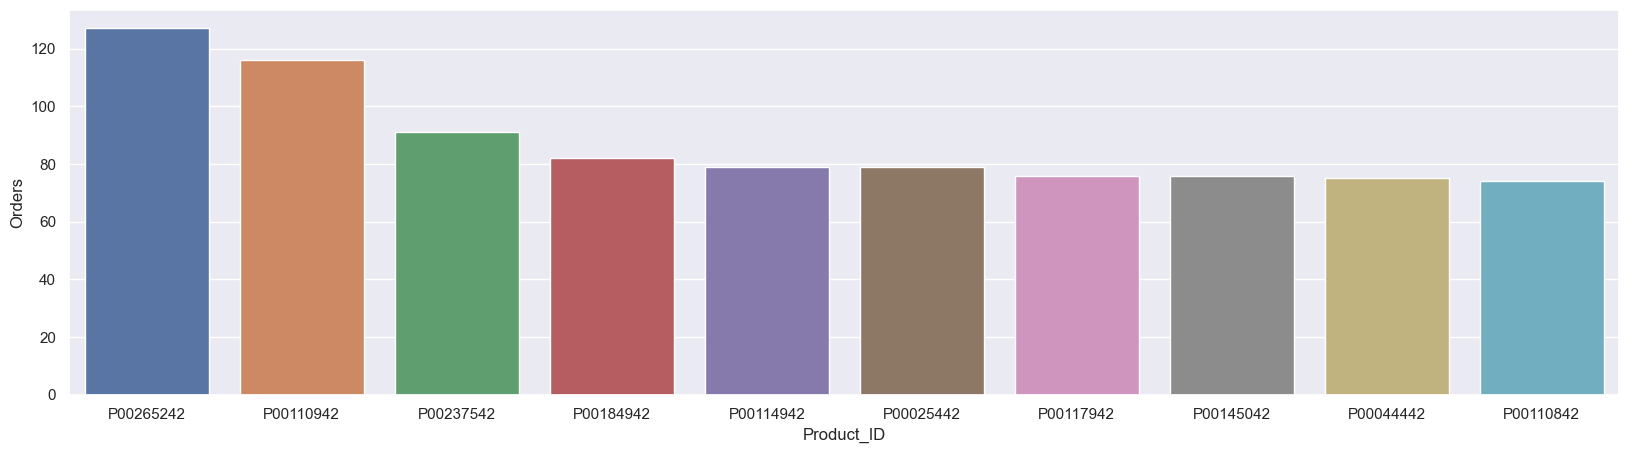

In [163]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', hue='Product_ID')

<Axes: xlabel='Product_ID'>

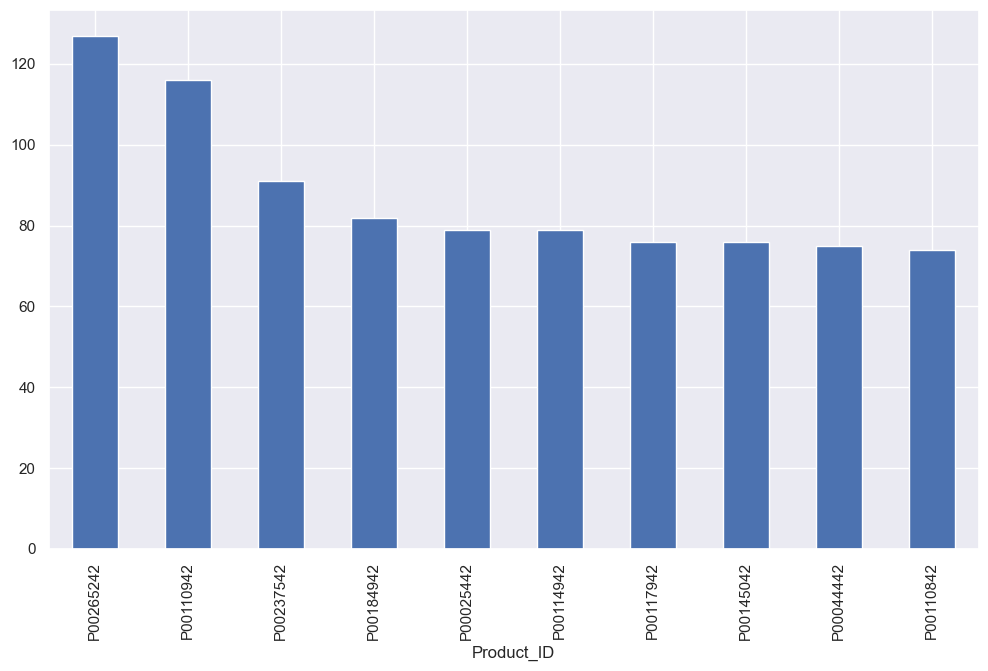

In [164]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plot.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')